##### Durability of Immunity against reinfection of SARS-CoV-2

##### Author: Sangeetha Vijayam
##### Reviwer: Jeffrey P. Townsend, Alex Dornburg, Hayley B. Hassler
##### Date: 10/11/2022

##### 1. Import and get header data

In [1]:
import pandas as pd
import numpy
from datetime import datetime

inputFile = "updated_OD_filev7_org.csv"

df2 = pd.read_csv(inputFile)

print(df2)

      Unnamed: 0     X      Date      Virus  OD_value     V4     V5        V6  \
0              1     1   8/20/85       229E  0.614941  False    NaN       NaN   
1              1     2  11/18/85       229E  0.870174  False   90.0  0.002836   
2              1     3   2/14/86       229E  0.709271  False   88.0 -0.001828   
3              1     4   5/29/86       229E  0.617718  False  104.0 -0.000880   
4              1     5    9/5/86       229E  0.698786  False   99.0  0.000819   
...          ...   ...       ...        ...       ...    ...    ...       ...   
3033          10  3034   2/21/86  SOSIP_HIV  0.854123  False   91.0 -0.001696   
3034          10  3035   5/23/86  SOSIP_HIV  0.805457  False   91.0 -0.000535   
3035          10  3036   8/11/86  SOSIP_HIV  0.909822  False   80.0  0.001305   
3036          10  3037  11/13/86  SOSIP_HIV  1.050687  False   94.0  0.001499   
3037          10  3038   2/24/87  SOSIP_HIV  0.981110    NaN  103.0 -0.000676   

            V8        V9  


In [2]:
headers = list(df2.head(0))
headers

['Unnamed: 0', 'X', 'Date', 'Virus', 'OD_value', 'V4', 'V5', 'V6', 'V8', 'V9']

##### Take dataset without headers

In [3]:
noheaderdataset0 = pd.read_csv(inputFile).iloc[0:]
noheaderdataset0

,Unnamed: 0,X,Date,Virus,OD_value,V4,V5,V6,V8,V9
0,1,1,8/20/85,229E,0.614941,False,NaN,NaN,0.149344,NaN
1,1,2,11/18/85,229E,0.870174,False,90.0,0.002836,0.211330,0.000689
2,1,3,2/14/86,229E,0.709271,False,88.0,-0.001828,0.172253,-0.000444
3,1,4,5/29/86,229E,0.617718,False,104.0,-0.000880,0.150019,-0.000214
4,1,5,9/5/86,229E,0.698786,False,99.0,0.000819,0.169707,0.000199
...,...,...,...,...,...,...,...,...,...,...
3033,10,3034,2/21/86,SOSIP_HIV,0.854123,False,91.0,-0.001696,0.630368,-0.001252
3034,10,3035,5/23/86,SOSIP_HIV,0.805457,False,91.0,-0.000535,0.594452,-0.000395
3035,10,3036,8/11/86,SOSIP_HIV,0.909822,False,80.0,0.001305,0.671476,0.000963
3036,10,3037,11/13/86,SOSIP_HIV,1.050687,False,94.0,0.001499,0.775439,0.001106


##### Remove Rowws only with NaN => "NA:"

In [4]:
noheaderdataset = noheaderdataset0.dropna(axis = 0, how ='all')
noheaderdataset

,Unnamed: 0,X,Date,Virus,OD_value,V4,V5,V6,V8,V9
0,1,1,8/20/85,229E,0.614941,False,NaN,NaN,0.149344,NaN
1,1,2,11/18/85,229E,0.870174,False,90.0,0.002836,0.211330,0.000689
2,1,3,2/14/86,229E,0.709271,False,88.0,-0.001828,0.172253,-0.000444
3,1,4,5/29/86,229E,0.617718,False,104.0,-0.000880,0.150019,-0.000214
4,1,5,9/5/86,229E,0.698786,False,99.0,0.000819,0.169707,0.000199
...,...,...,...,...,...,...,...,...,...,...
3033,10,3034,2/21/86,SOSIP_HIV,0.854123,False,91.0,-0.001696,0.630368,-0.001252
3034,10,3035,5/23/86,SOSIP_HIV,0.805457,False,91.0,-0.000535,0.594452,-0.000395
3035,10,3036,8/11/86,SOSIP_HIV,0.909822,False,80.0,0.001305,0.671476,0.000963
3036,10,3037,11/13/86,SOSIP_HIV,1.050687,False,94.0,0.001499,0.775439,0.001106


##### Take transpose of dataset

In [5]:
fulldataset = numpy.transpose(noheaderdataset) 

fulldataset

,0,1,2,3,4,5,6,7,8,9,...,3028,3029,3030,3031,3032,3033,3034,3035,3036,3037
Unnamed: 0,1,1,1,1,1,1,1,1,1,1,...,10,10,10,10,10,10,10,10,10,10
X,1,2,3,4,5,6,7,8,9,10,...,3029,3030,3031,3032,3033,3034,3035,3036,3037,3038
Date,8/20/85,11/18/85,2/14/86,5/29/86,9/5/86,11/26/86,3/4/87,6/1/87,8/20/87,11/19/87,...,3/21/11,4/24/85,5/23/85,8/23/85,11/22/85,2/21/86,5/23/86,8/11/86,11/13/86,2/24/87
Virus,229E,229E,229E,229E,229E,229E,229E,229E,229E,229E,...,SARS_CoV_2,SOSIP_HIV,SOSIP_HIV,SOSIP_HIV,SOSIP_HIV,SOSIP_HIV,SOSIP_HIV,SOSIP_HIV,SOSIP_HIV,SOSIP_HIV
OD_value,0.614941,0.870174,0.709271,0.617718,0.698786,0.762518,0.702607,1.97413,1.09826,1.00531,...,0.861376,0.92522,1.30295,1.27482,1.00848,0.854123,0.805457,0.909822,1.05069,0.98111
V4,False,False,False,False,False,False,False,False,False,False,...,NaN,False,False,False,False,False,False,False,False,NaN
V5,NaN,90,88,104,99,82,98,89,80,91,...,182,NaN,29,92,91,91,91,80,94,103
V6,NaN,0.00283593,-0.00182845,-0.000880309,0.000818863,0.000777221,-0.000611339,0.0142867,-0.0109483,-0.00102139,...,7.3e-05,NaN,0.0130252,-0.000305814,-0.00292672,-0.00169628,-0.000534789,0.00130457,0.00149856,-0.000675504
V8,0.149344,0.21133,0.172253,0.150019,0.169707,0.185185,0.170635,0.479436,0.266723,0.24415,...,0.64409,0.682841,0.961617,0.940853,0.744292,0.630368,0.594452,0.671476,0.775439,0.724089
V9,NaN,0.000688733,-0.000444057,-0.000213792,0.000198869,0.000188756,-0.00014847,0.00346967,-0.0026589,-0.000248054,...,5.46e-05,NaN,0.00961298,-0.0002257,-0.00216,-0.00125191,-0.00039469,0.00096281,0.00110598,-0.000498542


In [6]:
fulldataset = numpy.transpose(fulldataset) 

fulldataset

,Unnamed: 0,X,Date,Virus,OD_value,V4,V5,V6,V8,V9
0,1,1,8/20/85,229E,0.614941,False,NaN,NaN,0.149344,NaN
1,1,2,11/18/85,229E,0.870174,False,90,0.00283593,0.21133,0.000688733
2,1,3,2/14/86,229E,0.709271,False,88,-0.00182845,0.172253,-0.000444057
3,1,4,5/29/86,229E,0.617718,False,104,-0.000880309,0.150019,-0.000213792
4,1,5,9/5/86,229E,0.698786,False,99,0.000818863,0.169707,0.000198869
...,...,...,...,...,...,...,...,...,...,...
3033,10,3034,2/21/86,SOSIP_HIV,0.854123,False,91,-0.00169628,0.630368,-0.00125191
3034,10,3035,5/23/86,SOSIP_HIV,0.805457,False,91,-0.000534789,0.594452,-0.00039469
3035,10,3036,8/11/86,SOSIP_HIV,0.909822,False,80,0.00130457,0.671476,0.00096281
3036,10,3037,11/13/86,SOSIP_HIV,1.05069,False,94,0.00149856,0.775439,0.00110598


##### Get Length 

In [7]:
len(fulldataset)

3038

####SARS-CoV-1
#####SARS-CoV-1 Average peak-normalized OD post-infection (3 mo.)
#####Input Data: Average peak-normalized ELIZA ODs for SARS-CoV-1 N IgG antibodies from Li et al. 2006, "Long-Term Persistence of Robust Antibody and Cytotoxic T Cell Responses in Recovered Patients Infected with SARS Coronavirus", PLoS ONE.

#####days : 30, 90, 180, 360, 540
#####ODs : 1.713299344, 1.636578538, 1.329728934, 0.767986943, 0.493304977

In [8]:
sarscov1data = [[1, 30, "SARSCoV1", 1.713299344, True, "NA", "NA"],
                [2, 90, "SARSCoV1", 1.238, False, (90 - 30), ((1.636578538-1.713299344) / 1.713299344)/(90-30)],
                [3, 180, "SARSCoV1", 1.16, False, (180 - 90), ((1.329728934-1.636578538) / 1.713299344)/(180 - 90)], 
                [4, 360, "SARSCoV1", 1.043, False, (360 - 180), ((0.767986943-1.329728934) / 1.713299344)/(360 - 180)],
                [5, 540, "SARSCoV1", 0.919, False, (540 - 360), ((0.493304977-0.767986943) / 1.713299344)/(540 - 360)]]

In [9]:
print(sarscov1data)

[[1, 30, 'SARSCoV1', 1.713299344, True, 'NA', 'NA'], [2, 90, 'SARSCoV1', 1.238, False, 60, -0.0007463261481293135], [3, 180, 'SARSCoV1', 1.16, False, 90, -0.001989985028818434], [4, 360, 'SARSCoV1', 1.043, False, 180, -0.0018215082202756561], [5, 540, 'SARSCoV1', 0.919, False, 180, -0.0008906855229743337]]


##### SARS-CoV-1 Waning of Antibody OD

In [10]:
sarscov1datalength = len(sarscov1data)
sarscov1datalength

5

##### Table/ArrayList creation

In [11]:
for i in range(0,len(sarscov1data)):
    for j in range(0,len(sarscov1data[i])):
        print(sarscov1data[i][j])

1
30
SARSCoV1
1.713299344
True
NA
NA
2
90
SARSCoV1
1.238
False
60
-0.0007463261481293135
3
180
SARSCoV1
1.16
False
90
-0.001989985028818434
4
360
SARSCoV1
1.043
False
180
-0.0018215082202756561
5
540
SARSCoV1
0.919
False
180
-0.0008906855229743337


In [12]:
print(sarscov1data[2][6])

-0.001989985028818434


In [13]:
aod = 0.925
sarscov1paddedmeanwaning = dict();
index = 0

while aod <= 1.7:      
    index  = 2
    valueList = list()
    
    while index <= sarscov1datalength:    
        print("aod:" + str(aod))

        if ( (sarscov1data[index-2][3] >= aod and aod >= sarscov1data[index-1][3]) or 
             (sarscov1data[index-2][3] <= aod and aod <= sarscov1data[index-1][3]) ) : 
            print(sarscov1data[index-1][6])
            valueList.append(sarscov1data[index-1][6])
            
        sarscov1paddedmeanwaning["{0:.3f}".format(aod)] = valueList
            
        index = index + 1

    aod = aod + 0.05

print(len(sarscov1paddedmeanwaning))

aod:0.925
aod:0.925
aod:0.925
aod:0.925
-0.0008906855229743337
aod:0.9750000000000001
aod:0.9750000000000001
aod:0.9750000000000001
aod:0.9750000000000001
-0.0008906855229743337
aod:1.0250000000000001
aod:1.0250000000000001
aod:1.0250000000000001
aod:1.0250000000000001
-0.0008906855229743337
aod:1.0750000000000002
aod:1.0750000000000002
aod:1.0750000000000002
-0.0018215082202756561
aod:1.0750000000000002
aod:1.1250000000000002
aod:1.1250000000000002
aod:1.1250000000000002
-0.0018215082202756561
aod:1.1250000000000002
aod:1.1750000000000003
aod:1.1750000000000003
-0.001989985028818434
aod:1.1750000000000003
aod:1.1750000000000003
aod:1.2250000000000003
aod:1.2250000000000003
-0.001989985028818434
aod:1.2250000000000003
aod:1.2250000000000003
aod:1.2750000000000004
-0.0007463261481293135
aod:1.2750000000000004
aod:1.2750000000000004
aod:1.2750000000000004
aod:1.3250000000000004
-0.0007463261481293135
aod:1.3250000000000004
aod:1.3250000000000004
aod:1.3250000000000004
aod:1.3750000000000

In [14]:
for key in sarscov1paddedmeanwaning:
    print(str(key) + " " + str(sarscov1paddedmeanwaning[key]))

0.925 [-0.0008906855229743337]
0.975 [-0.0008906855229743337]
1.025 [-0.0008906855229743337]
1.075 [-0.0018215082202756561]
1.125 [-0.0018215082202756561]
1.175 [-0.001989985028818434]
1.225 [-0.001989985028818434]
1.275 [-0.0007463261481293135]
1.325 [-0.0007463261481293135]
1.375 [-0.0007463261481293135]
1.425 [-0.0007463261481293135]
1.475 [-0.0007463261481293135]
1.525 [-0.0007463261481293135]
1.575 [-0.0007463261481293135]
1.625 [-0.0007463261481293135]
1.675 [-0.0007463261481293135]


In [15]:
import numpy as np

aodList = list(sarscov1paddedmeanwaning.keys())
aodList

arraod = np.array(aodList)
arraod = arraod.astype(float)

In [16]:
covdataList = list(sarscov1paddedmeanwaning.values())
covdataList

arrcov = np.array(covdataList).squeeze()

In [17]:
from scipy.interpolate import interp1d
print(len(aodList))
print(len(covdataList))

y_interpolation = interp1d(arraod, arrcov)

16
16


In [18]:
interpolate_x_new = 1.0


print("Value of Y at x = {} is".format(interpolate_x_new),
      y_interpolation(interpolate_x_new))

Value of Y at x = 1.0 is -0.0008906855229743337


In [19]:
sarscov1antibodytimecourse = list()

sarscov1antibodytimecourse.append(1.0)

In [20]:
str(sarscov1antibodytimecourse)

'[1.0]'

In [21]:
print(sarscov1antibodytimecourse[0])

1.0


In [22]:
day = 0

while sarscov1antibodytimecourse[day] >= 0.925:
    print("day" + str(day))
    print("sarscov1antibodytimecourse[day]")
    print(sarscov1antibodytimecourse[day])
    print("inerpolate of sarscov1paddedmeanwaning")
    print(y_interpolation(sarscov1antibodytimecourse[day]))
    print("Added value")
    sarscov1antibodytimecourse.append(sarscov1antibodytimecourse[day] + y_interpolation(sarscov1antibodytimecourse[day]))
    day = day + 1

day0
sarscov1antibodytimecourse[day]
1.0
inerpolate of sarscov1paddedmeanwaning
-0.0008906855229743337
Added value
day1
sarscov1antibodytimecourse[day]
0.9991093144770257
inerpolate of sarscov1paddedmeanwaning
-0.0008906855229743337
Added value
day2
sarscov1antibodytimecourse[day]
0.9982186289540513
inerpolate of sarscov1paddedmeanwaning
-0.0008906855229743337
Added value
day3
sarscov1antibodytimecourse[day]
0.997327943431077
inerpolate of sarscov1paddedmeanwaning
-0.0008906855229743337
Added value
day4
sarscov1antibodytimecourse[day]
0.9964372579081027
inerpolate of sarscov1paddedmeanwaning
-0.0008906855229743337
Added value
day5
sarscov1antibodytimecourse[day]
0.9955465723851283
inerpolate of sarscov1paddedmeanwaning
-0.0008906855229743337
Added value
day6
sarscov1antibodytimecourse[day]
0.994655886862154
inerpolate of sarscov1paddedmeanwaning
-0.0008906855229743337
Added value
day7
sarscov1antibodytimecourse[day]
0.9937652013391797
inerpolate of sarscov1paddedmeanwaning
-0.000890685

In [23]:
sarscov1antibodytimecourse

[1.0,
 0.9991093144770257,
 0.9982186289540513,
 0.997327943431077,
 0.9964372579081027,
 0.9955465723851283,
 0.994655886862154,
 0.9937652013391797,
 0.9928745158162053,
 0.991983830293231,
 0.9910931447702567,
 0.9902024592472823,
 0.989311773724308,
 0.9884210882013337,
 0.9875304026783593,
 0.986639717155385,
 0.9857490316324107,
 0.9848583461094363,
 0.983967660586462,
 0.9830769750634877,
 0.9821862895405133,
 0.981295604017539,
 0.9804049184945647,
 0.9795142329715903,
 0.978623547448616,
 0.9777328619256417,
 0.9768421764026674,
 0.975951490879693,
 0.9750608053567187,
 0.9741701198337444,
 0.97327943431077,
 0.9723887487877957,
 0.9714980632648214,
 0.970607377741847,
 0.9697166922188727,
 0.9688260066958984,
 0.967935321172924,
 0.9670446356499497,
 0.9661539501269754,
 0.965263264604001,
 0.9643725790810267,
 0.9634818935580524,
 0.962591208035078,
 0.9617005225121037,
 0.9608098369891294,
 0.959919151466155,
 0.9590284659431807,
 0.9581377804202064,
 0.957247094897232,
 0.

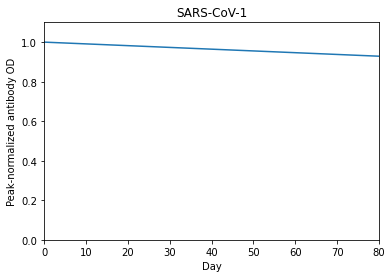

In [24]:
from matplotlib import pyplot as plt
plt.plot(sarscov1antibodytimecourse)
plt.ylim(0,1.1)
plt.xlim(0,80)
plt.xlabel("Day")
plt.ylabel("Peak-normalized antibody OD")
plt.title('SARS-CoV-1')
plt.show()

###### Export to Excel

In [25]:
df3 = pd.DataFrame(sarscov1antibodytimecourse, columns=["Antibody Time Course"])
df3.to_csv('SARS-CoV-1-Antibody-Time-Course.csv', index=False)

In [26]:
sarscov1baseline = 0.1298892

###### This baseline peak-normalized N IgG antibody level for SARS-CoV-1 comes from the ancestral and 
###### descendent states analysis that used the baselines for the human "seasonal" coronaviruses to estimate 
###### the baselines for the zoonotic coronaviruses.

In [27]:
print(sarscov1baseline)

0.1298892


In [28]:
import math

def calculatelambda(sarscov1baseline, lambdaValue, index):
    exponentValue = -lambdaValue * index
    result = sarscov1baseline + (1 - sarscov1baseline) * math.exp(exponentValue)
    return result

In [29]:
sarscov1lsfuncwfixedbaseline = 0
currentMinValue = float('inf')
currentMinValue

for index in range(0, (len(sarscov1antibodytimecourse))):
    print(sarscov1antibodytimecourse[index] )
    ##Need to find the step value and maximum value for this lambdaValue
    lambdaValue = 0.002
    ##Added 11/28
    sarscov1lsfuncwfixedbaseline = (sarscov1antibodytimecourse[index]) - math.pow((calculatelambda(sarscov1baseline, lambdaValue, index)), 2)     
    print(sarscov1lsfuncwfixedbaseline)
    
    if sarscov1lsfuncwfixedbaseline < currentMinValue:
        currentMinValue = sarscov1lsfuncwfixedbaseline      

1.0
0.0
0.9991093144770257
0.0025832572314267166
0.9982186289540513
0.005153546981273016
0.997327943431077
0.007710919216593615
0.9964372579081027
0.010255423708569356
0.9955465723851283
0.012787110033281257
0.994655886862154
0.015306027572483338
0.9937652013391797
0.017812225514369895
0.9928745158162053
0.020305752854341885
0.991983830293231
0.022786658395769765
0.9910931447702567
0.025254990750752215
0.9902024592472823
0.02771079834087231
0.989311773724308
0.030154129397952256
0.9884210882013337
0.03258503196480289
0.9875304026783593
0.03500355389597154
0.986639717155385
0.03740974285848597
0.9857490316324107
0.0398036463325967
0.9848583461094363
0.042185311612515264
0.983967660586462
0.044554785807149666
0.9830769750634877
0.04691211584083743
0.9821862895405133
0.04925734845407559
0.981295604017539
0.0515905302042472
0.9804049184945647
0.053911707466345216
0.9795142329715903
0.056220926433694696
0.978623547448616
0.05851823311866999
0.9777328619256417
0.06080367335341075
0.976842176

In [30]:
currentMinValue

0.0

##### This value of lambda goes into the ancestral and descendent states analysis estimating 
##### a and b for the zoonotic coronaviruses.

In [31]:
sarscov1halflife = np.log(2) / 0.001039397687226661 

In [32]:
print(sarscov1halflife)

666.873891560614


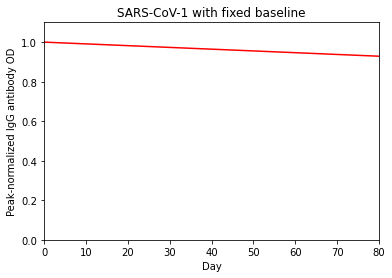

In [33]:
plt.plot(sarscov1antibodytimecourse, color='red')
plt.ylim(0,1.1)
plt.xlim(0,80)
plt.xlabel("Day")
plt.ylabel("Peak-normalized IgG antibody OD")
plt.title('SARS-CoV-1 with fixed baseline')
plt.show()

In [34]:
lambdaForPlot = 0.0010394
result = 0
plotBaseLines = list()

for days in range(0, len(sarscov1antibodytimecourse)):
    exponentValue = -lambdaForPlot * days
    result = sarscov1baseline + (1 - sarscov1baseline) * math.exp(exponentValue)
    plotBaseLines.append(result)

In [35]:
plotBaseLines

[1.0,
 0.9990960766848065,
 0.9981930924193982,
 0.9972910462282336,
 0.9963899371367851,
 0.9954897641715371,
 0.9945905263599857,
 0.9936922227306371,
 0.9927948523130066,
 0.9918984141376179,
 0.9910029072360019,
 0.9901083306406956,
 0.9892146833852409,
 0.9883219645041835,
 0.9874301730330729,
 0.9865393080084596,
 0.9856493684678956,
 0.9847603534499324,
 0.9838722619941204,
 0.9829850931410079,
 0.9820988459321399,
 0.981213519410057,
 0.9803291126182944,
 0.9794456246013811,
 0.9785630544048388,
 0.9776814010751805,
 0.97680066365991,
 0.9759208412075202,
 0.975041932767493,
 0.9741639373902973,
 0.9732868541273888,
 0.9724106820312084,
 0.9715354201551814,
 0.9706610675537165,
 0.9697876232822047,
 0.9689150863970183,
 0.96804345595551,
 0.9671727310160118,
 0.9663029106378337,
 0.965433993881263,
 0.9645659798075638,
 0.9636988674789745,
 0.9628326559587084,
 0.9619673443109518,
 0.9611029316008629,
 0.9602394168945715,
 0.9593767992591773,
 0.9585150777627492,
 0.95765425147

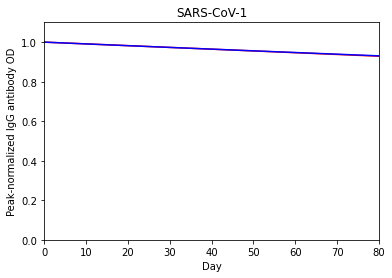

In [36]:
from matplotlib import pyplot as plt

plt.plot(sarscov1antibodytimecourse, color='red')
plt.ylim(0,1.1)
plt.xlim(0,80)

plt.xlabel("Day")

plt.plot(plotBaseLines, color = 'blue')

plt.ylabel("Peak-normalized IgG antibody OD")
plt.title('SARS-CoV-1 with fixed baseline')

plt.title('SARS-CoV-1')
plt.show()

In [37]:
print(len(sarscov1antibodytimecourse))

86


In [41]:
sarscov1antibodytimecourseplusexp = sarscov1antibodytimecourse
day = len(sarscov1antibodytimecourse)

day

86

In [42]:
#while day < 4393:
#Small file 86 records
#while day < 88:
maxDays = 87
while day < maxDays:
    day = day + 1
    print("day")
    print(day)
    exponentValueBaseLine = -0.001039397687226661
    tempValue = sarscov1baseline + (sarscov1antibodytimecourseplusexp[day-1] - sarscov1baseline) * math.exp(exponentValueBaseLine)
    print('tempValue')
    print(tempValue)
    sarscov1antibodytimecourseplusexp.append(tempValue)

day
87


IndexError: list index out of range

In [43]:
sarscov1antibodytimecourseplusexp

[1.0,
 0.9991093144770257,
 0.9982186289540513,
 0.997327943431077,
 0.9964372579081027,
 0.9955465723851283,
 0.994655886862154,
 0.9937652013391797,
 0.9928745158162053,
 0.991983830293231,
 0.9910931447702567,
 0.9902024592472823,
 0.989311773724308,
 0.9884210882013337,
 0.9875304026783593,
 0.986639717155385,
 0.9857490316324107,
 0.9848583461094363,
 0.983967660586462,
 0.9830769750634877,
 0.9821862895405133,
 0.981295604017539,
 0.9804049184945647,
 0.9795142329715903,
 0.978623547448616,
 0.9777328619256417,
 0.9768421764026674,
 0.975951490879693,
 0.9750608053567187,
 0.9741701198337444,
 0.97327943431077,
 0.9723887487877957,
 0.9714980632648214,
 0.970607377741847,
 0.9697166922188727,
 0.9688260066958984,
 0.967935321172924,
 0.9670446356499497,
 0.9661539501269754,
 0.965263264604001,
 0.9643725790810267,
 0.9634818935580524,
 0.962591208035078,
 0.9617005225121037,
 0.9608098369891294,
 0.959919151466155,
 0.9590284659431807,
 0.9581377804202064,
 0.957247094897232,
 0.

In [44]:
print(len(sarscov1antibodytimecourseplusexp))

86


Text(0.5, 1.0, 'SARS-CoV-1')

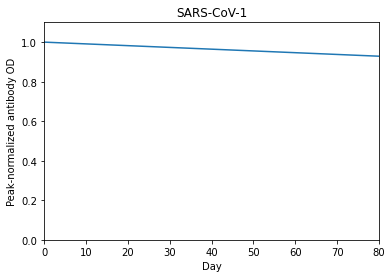

In [45]:
import matplotlib.pyplot as plt2
plt2.plot(sarscov1antibodytimecourseplusexp)
plt2.ylim(0,1.1)
plt.xlim(0,80)
plt2.xlabel("Day")
plt2.ylabel("Peak-normalized antibody OD")
plt2.title('SARS-CoV-1')

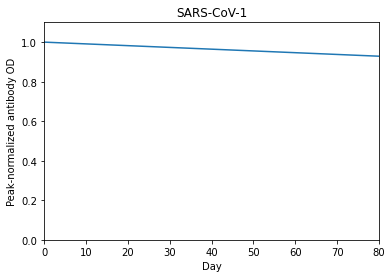

In [46]:
import matplotlib.pyplot as plt3

f = plt3.figure()
plt3.plot(sarscov1antibodytimecourseplusexp)

plt3.ylim(0,1.1)
plt.xlim(0,80)
plt3.xlabel("Day")
plt3.ylabel("Peak-normalized antibody OD")
plt3.title('SARS-CoV-1')
plt3.show()

f.savefig("SARS-CoV-1_nOD-by-Day_ 08Jun2021.pdf", bbox_inches='tight')

###### SARS-CoV-1 Probability of Infection | Antibody OD

In [47]:
import math

def sarscov1probinfgivenaod(aod):
    exponentValue = 5.248568 + (9.749887 * aod)
    result = 1 / (1 + math.exp(exponentValue))
    return result

In [48]:
sarscov1probinfgivenaodList = list()

currentValue = 0;

while( currentValue <= 1):
    #####Choosen this constant for plotting with incremental values
    currentValue = currentValue + 0.00625
    sarscov1probinfgivenaodList.append(sarscov1probinfgivenaod(currentValue))

sarscov1probinfgivenaodList

[0.004920048036205034,
 0.0046305349546705765,
 0.004357983240388405,
 0.004101407725307196,
 0.0038598794876948807,
 0.0036325227527267234,
 0.0034185119509150172,
 0.0032170689278776783,
 0.003027460299016794,
 0.002848994942780972,
 0.002681021626311956,
 0.00252292675742194,
 0.002374132257009232,
 0.0022340935461931384,
 0.002102297642631026,
 0.0019782613606689724,
 0.001861529610170043,
 0.0017516737890590514,
 0.0016482902648181487,
 0.0015509989403623963,
 0.0014594418999173602,
 0.001373282130710893,
 0.001292202316477827,
 0.0012159036989585926,
 0.0011441050037504432,
 0.0010765414270424323,
 0.0010129636799324309,
 0.000953137087185962,
 0.0008968407374523602,
 0.0008438666821036925,
 0.0007940191800058812,
 0.000747113985669658,
 0.0007029776783613526,
 0.0006614470298801432,
 0.0006223684088294021,
 0.0005855972193253069,
 0.0005509973721959806,
 0.0005184407868294042,
 0.000487806921928195,
 0.00045898233352434874,
 0.0004318602586973432,
 0.0004063402235247394,
 0.0003

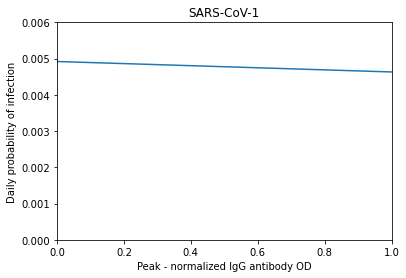

In [49]:
plt.plot(sarscov1probinfgivenaodList)
plt.ylim(0,0.006)
plt.xlim(0.0, 1.0)
plt.xlabel("Peak - normalized IgG antibody OD")
plt.ylabel("Daily probability of infection")
plt.title('SARS-CoV-1')
plt.show()

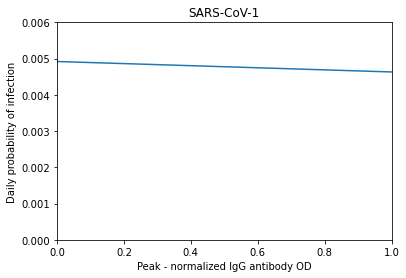

In [50]:
import matplotlib.pyplot as plt4

f2 = plt4.figure()
plt4.plot(sarscov1probinfgivenaodList)

plt4.ylim(0,0.006)
plt4.xlim(0.0, 1.0)
plt4.xlabel("Peak - normalized IgG antibody OD")
plt4.ylabel("Daily probability of infection")
plt4.title('SARS-CoV-1')
plt4.show()

f2.savefig("SARS-CoV-1_PrInf-by-nOD.pdf", bbox_inches='tight')

In [51]:
import math

def sarscov1probinfgivenall(a, b, aod):
    exponentValue = (-a) + (-b) * aod
    result = 1 / (1 + math.exp(exponentValue))
    return result

In [52]:
def populatesarscov1probinfList(a, b):
    sarscov1probinfList = list()
    
    x = 0;

    while( x <= 1):
        x = x + 0.05
        sarscov1probinfList.append(sarscov1probinfgivenall(a, b, x))
    
    return sarscov1probinfList  

####### **************
####### The alternate values for a and b above come from our results using different approaches toward building the molecular evolutionary tree of the coronaviruses and toward building the time tree of the coronaviruses (see Supplement).

####### This panel goes into a supplementary figure.
####### *************

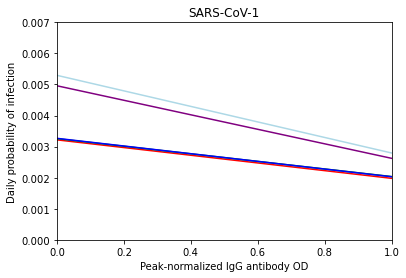

In [53]:
from matplotlib import pyplot as plt

sarscov1probinfList1 = populatesarscov1probinfList(-5.248568, -9.749887)

plt.plot(sarscov1probinfList1, color='red')
plt.ylim(0,0.007)
plt.xlim(0.0, 1.0)
plt.xlabel("Peak-normalized IgG antibody OD")

sarscov1probinfList2 = populatesarscov1probinfList(-5.252705, -9.424764)
sarscov1probinfList3 = populatesarscov1probinfList(-4.593771, -12.8393)
sarscov1probinfList4 = populatesarscov1probinfList(-4.6620521, -12.79206)
sarscov1probinfList5 = populatesarscov1probinfList(-5.243759, -9.540128)

plt.plot(sarscov1probinfList2, color = 'green')
plt.plot(sarscov1probinfList3, color = 'lightblue')
plt.plot(sarscov1probinfList4, color = 'purple')
plt.plot(sarscov1probinfList5, color = 'blue')

plt.ylabel("Daily probability of infection")
plt.title('SARS-CoV-1')
#plt.show()

plt.title('SARS-CoV-1')
plt.show()

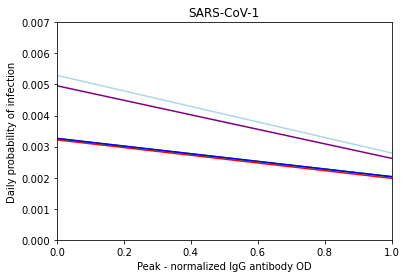

In [54]:
import matplotlib.pyplot as plt5

f5 = plt5.figure()
plt5.plot(sarscov1probinfList1, color='red')
plt5.plot(sarscov1probinfList2, color = 'green')
plt5.plot(sarscov1probinfList3, color = 'lightblue')
plt5.plot(sarscov1probinfList4, color = 'purple')
plt5.plot(sarscov1probinfList5, color = 'blue')

plt5.ylim(0,0.007)
plt5.xlim(0.0, 1.0)

plt5.xlabel("Peak - normalized IgG antibody OD")
plt5.ylabel("Daily probability of infection")
plt5.title('SARS-CoV-1')
plt5.show()

f5.savefig("SARS-CoV-1_PrInfs-by-nOD.pdf", bbox_inches='tight')

##### SARS-CoV-1 Probability of No Reinfection Time Course

In [70]:
sarscov1probnoreinfectiontimecourse = list()
day = 0
sarscov1probnoreinfectiontimecourse.append(1.0)

sarscov1probnoreinfectiontimecourse.append(sarscov1probnoreinfectiontimecourse[day] * (1-sarscov1probinfgivenaod(sarscov1antibodytimecourseplusexp[day+1])))

In [71]:
sarscov1probnoreinfectiontimecourse

[1.0, 0.9999996909526161]

In [72]:
print(len(sarscov1antibodytimecourse))

86


In [73]:
print(len(sarscov1probnoreinfectiontimecourse))

2


In [74]:
#### Need to change days to 4393
#while day < 4393:
while day < 85:
    print("day : " + str(day))
    if(day < len(sarscov1antibodytimecourse)):
        sarscov1probnoreinfectiontimecourse.append(sarscov1probnoreinfectiontimecourse[day] * (1 - sarscov1probinfgivenaod(sarscov1antibodytimecourseplusexp[day + 1])))
    else:
        #Need to test this limit
        sarscov1probnoreinfectiontimecourse.append(sarscov1probnoreinfectiontimecourse[day] * (1 - sarscov1probinfgivenaod(sarscov1antibodytimecourseplusexp[1392])))
                    
    day = day + 1   

day : 0
day : 1
day : 2
day : 3
day : 4
day : 5
day : 6
day : 7
day : 8
day : 9
day : 10
day : 11
day : 12
day : 13
day : 14
day : 15
day : 16
day : 17
day : 18
day : 19
day : 20
day : 21
day : 22
day : 23
day : 24
day : 25
day : 26
day : 27
day : 28
day : 29
day : 30
day : 31
day : 32
day : 33
day : 34
day : 35
day : 36
day : 37
day : 38
day : 39
day : 40
day : 41
day : 42
day : 43
day : 44
day : 45
day : 46
day : 47
day : 48
day : 49
day : 50
day : 51
day : 52
day : 53
day : 54
day : 55
day : 56
day : 57
day : 58
day : 59
day : 60
day : 61
day : 62
day : 63
day : 64
day : 65
day : 66
day : 67
day : 68
day : 69
day : 70
day : 71
day : 72
day : 73
day : 74
day : 75
day : 76
day : 77
day : 78
day : 79
day : 80
day : 81
day : 82
day : 83
day : 84


In [75]:
print(sarscov1probnoreinfectiontimecourse)

[1.0, 0.9999996909526161, 0.9999996909526161, 0.9999993792098493, 0.999999376490861, 0.9999990620054903, 0.9999990565198793, 0.9999987392438563, 0.9999987309431536, 0.9999984108275883, 0.9999983996624758, 0.9999980766576216, 0.9999980625779172, 0.9999977366331563, 0.9999977195877985, 0.9999973906516262, 0.9999973705886595, 0.9999970386086686, 0.9999970154752268, 0.9999966803980925, 0.9999966541403836, 0.9999963159118465, 0.999996286475136, 0.9999959450399863, 0.9999959123685811, 0.9999955676706419, 0.9999955317078729, 0.9999951836899831, 0.9999951443781886, 0.9999947929821856, 0.9999947502626939, 0.9999943954293964, 0.9999943492425079, 0.9999939909116976, 0.9999939411966667, 0.9999935793070707, 0.9999935260020879, 0.9999931604913597, 0.9999931035335324, 0.9999927343382334, 0.9999926736635677, 0.9999923007191479, 0.9999922362625283, 0.9999918595033069, 0.9999917911984777, 0.9999914105576234, 0.9999913383371678, 0.9999909537466786, 0.999990877541999, 0.9999904889326814, 0.999990408673978

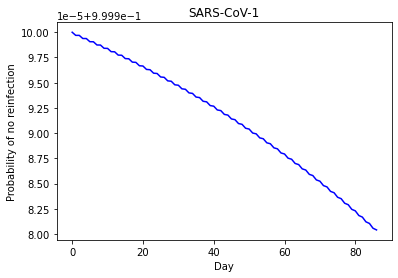

In [76]:
plt.plot(sarscov1probnoreinfectiontimecourse, color='blue')
#Limit not working
#plt.ylim(0,1.0)
plt.xlabel("Day")
plt.ylabel("Probability of no reinfection")
plt.title('SARS-CoV-1')
plt.show()

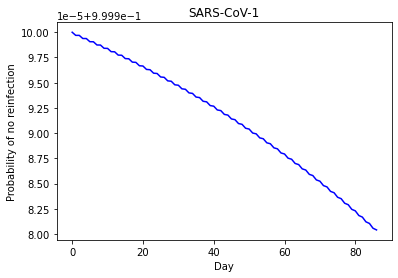

In [77]:
import matplotlib.pyplot as plt6

f6 = plt6.figure()
plt6.plot(sarscov1probnoreinfectiontimecourse, color = 'blue')

#plt6.ylim(0,0.007)
#plt6.xlim(0.0, 1.0)

plt6.xlabel("Day")
plt6.ylabel("Probability of no reinfection")
plt6.title('SARS-CoV-1')
plt6.show()

f6.savefig("SARS-CoV-1_PnorInfTimecourse-by-Day.pdf", bbox_inches='tight')

In [78]:
print(len(sarscov1probnoreinfectiontimecourse))

87


In [79]:
sarscov1probreinfection = list()

day = 0

#while day < 4393:
#while day < 255:
while day < 85:
    day = day + 1  
    #print("day : " + str(day))    
    if day < 1392:
        tempValue = sarscov1probinfgivenaod(sarscov1antibodytimecourseplusexp[day]) * sarscov1probnoreinfectiontimecourse[day]
    #Yet to test the else
    else:
        tempValue = sarscov1probinfgivenaod(sarscov1antibodytimecourseplusexp[1392])* sarscov1probnoreinfectiontimecourse[day]
        #tempValue = sarscov1probinfgivenaod(sarscov1antibodytimecourseplusexp[3])* sarscov1probnoreinfectiontimecourse[day]
    
    sarscov1probreinfection.append(tempValue)      

Text(0.5, 1.0, 'SARS-CoV-1')

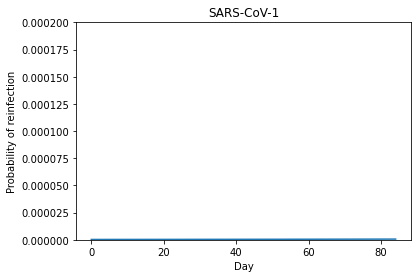

In [80]:
import matplotlib.pyplot as plt7
plt7.plot(sarscov1probreinfection)
plt7.ylim(0, 0.0002)
plt7.xlabel("Day")
plt7.ylabel("Probability of reinfection")
plt7.title('SARS-CoV-1') 

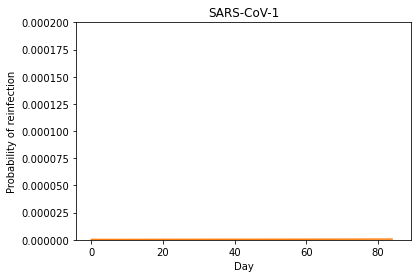

In [81]:
import matplotlib.pyplot as plt7

f = plt7.figure()
plt7.plot(sarscov1antibodytimecourseplusexp)

plt7.plot(sarscov1probreinfection)
plt7.ylim(0, 0.0002)
plt7.xlabel("Day")
plt7.ylabel("Probability of reinfection")
plt7.title('SARS-CoV-1') 
f.savefig("SARS-CoV-1_PrInf-by-Day.pdf", bbox_inches='tight')

##SARS-CoV-2

##Input Data: Average peak-normalized ELIZA ODs for SARS-CoV-2 N IgG antibodies from Gudbjartsson et al. 2020, "Humoral Immune Response to SARS-CoV-2 in Iceland", New England Journal of Medicine.

##days : 35, 48, 70, 94, 109
##OD : 0.411, 0.399, 0.397, 0.350, 0.355

In [82]:
sarscov2data = [[1, 35, "SARSCoV2", 0.411/0.411, True, "NA", "NA"],
                [2, 48, "SARSCoV2", 0.399/0.411, False, (48 - 35), ((0.399 - 0.411) / 0.411)/(48 - 35)],
                [3, 70, "SARSCoV2", 0.397/0.411, False, (70 - 48), ((0.397 - 0.399) / 0.411)/(70 - 48)], 
                [4, 94, "SARSCoV2", 0.350/0.411, False, (95 - 70), ((0.350 - 0.397) / 0.411)/(94 - 70)]]             


##### SARS-CoV-2 Waning of Antibody OD

In [83]:
sarscov2datalength = len(sarscov2data)

In [84]:
print(sarscov2datalength)

4


In [85]:
for i in range(0,len(sarscov2data)):
    for j in range(0,len(sarscov2data[i])):
        print(sarscov2data[i][j])

1
35
SARSCoV2
1.0
True
NA
NA
2
48
SARSCoV2
0.9708029197080293
False
13
-0.002245929253228515
3
70
SARSCoV2
0.9659367396593675
False
22
-0.00022119000221190022
4
94
SARSCoV2
0.851581508515815
False
25
-0.004764801297648017


In [86]:
aod = 0.84
sarscov2paddedmeanwaning = dict();
sarscov2datalength = 4
index = 0

while aod <= 1:        
    index  = 2
    valueList = list()    
    
    while index <= sarscov2datalength:    
        print("aod :" + str(aod))
        if ( (sarscov2data[index-2][3] >= aod and aod >= sarscov2data[index-1][3]) or 
             (sarscov2data[index-2][3] <= aod and aod <= sarscov2data[index-1][3]) ) :
            valueList.append(sarscov1data[index-1][6])
        #else:
         #   valueList.append("None")
        if (len(valueList) != 0 ):
            sarscov2paddedmeanwaning["{0:.3f}".format(aod)] = valueList            
        index = index + 1    
    aod = aod + 0.02

print(len(sarscov2paddedmeanwaning))

aod :0.84
aod :0.84
aod :0.84
aod :0.86
aod :0.86
aod :0.86
aod :0.88
aod :0.88
aod :0.88
aod :0.9
aod :0.9
aod :0.9
aod :0.92
aod :0.92
aod :0.92
aod :0.9400000000000001
aod :0.9400000000000001
aod :0.9400000000000001
aod :0.9600000000000001
aod :0.9600000000000001
aod :0.9600000000000001
aod :0.9800000000000001
aod :0.9800000000000001
aod :0.9800000000000001
aod :1.0
aod :1.0
aod :1.0
8


In [87]:
for key in sarscov2paddedmeanwaning:
    print(str(key) + " " + str(sarscov2paddedmeanwaning[key]))

0.860 [-0.0018215082202756561]
0.880 [-0.0018215082202756561]
0.900 [-0.0018215082202756561]
0.920 [-0.0018215082202756561]
0.940 [-0.0018215082202756561]
0.960 [-0.0018215082202756561]
0.980 [-0.0007463261481293135]
1.000 [-0.0007463261481293135]


In [88]:
import numpy as np

aod2List = list(sarscov2paddedmeanwaning.keys())
aod2List

arraod2 = np.array(aod2List)
arraod2 = arraod2.astype(float)

In [89]:
covdata2List = list(sarscov2paddedmeanwaning.values())
covdata2List

arrcov2 = np.array(covdata2List).squeeze()

In [90]:
from scipy.interpolate import interp1d
print(len(aod2List))
print(len(covdata2List))

y_interpolation = interp1d(arraod2, arrcov2)

8
8


In [91]:
sarscov2antibodytimecourse = list()

sarscov2antibodytimecourse.append(1.0)

In [92]:
day = 0

while sarscov2antibodytimecourse[day] >= 0.86:
    print(day)
    print(sarscov2antibodytimecourse[day])
    print(sarscov2antibodytimecourse[day])
    print("sarscov2paddedmeanwaning")
    print(sarscov2paddedmeanwaning)
    print("sarscov2antibodytimecourse[day]")
    print(sarscov2antibodytimecourse[day])
    print("inerpolate of sarscov2paddedmeanwaning")
    print(y_interpolation(sarscov2antibodytimecourse[day]))
    print("Added value")
    test = sarscov2antibodytimecourse[day] + y_interpolation(sarscov2antibodytimecourse[day])
    sarscov2antibodytimecourse.append(sarscov2antibodytimecourse[day] + y_interpolation(sarscov2antibodytimecourse[day]))
    print("sarscov2antibodytimecourse")
    print(sarscov2antibodytimecourse)
    day = day + 1

0
1.0
1.0
sarscov2paddedmeanwaning
{'0.860': [-0.0018215082202756561], '0.880': [-0.0018215082202756561], '0.900': [-0.0018215082202756561], '0.920': [-0.0018215082202756561], '0.940': [-0.0018215082202756561], '0.960': [-0.0018215082202756561], '0.980': [-0.0007463261481293135], '1.000': [-0.0007463261481293135]}
sarscov2antibodytimecourse[day]
1.0
inerpolate of sarscov2paddedmeanwaning
-0.0007463261481293135
Added value
sarscov2antibodytimecourse
[1.0, 0.9992536738518707]
1
0.9992536738518707
0.9992536738518707
sarscov2paddedmeanwaning
{'0.860': [-0.0018215082202756561], '0.880': [-0.0018215082202756561], '0.900': [-0.0018215082202756561], '0.920': [-0.0018215082202756561], '0.940': [-0.0018215082202756561], '0.960': [-0.0018215082202756561], '0.980': [-0.0007463261481293135], '1.000': [-0.0007463261481293135]}
sarscov2antibodytimecourse[day]
0.9992536738518707
inerpolate of sarscov2paddedmeanwaning
-0.0007463261481293135
Added value
sarscov2antibodytimecourse
[1.0, 0.999253673851870

In [93]:
print(sarscov2antibodytimecourse)

[1.0, 0.9992536738518707, 0.9985073477037414, 0.9977610215556121, 0.9970146954074828, 0.9962683692593535, 0.9955220431112242, 0.9947757169630949, 0.9940293908149656, 0.9932830646668362, 0.9925367385187069, 0.9917904123705776, 0.9910440862224483, 0.990297760074319, 0.9895514339261897, 0.9888051077780604, 0.9880587816299311, 0.9873124554818018, 0.9865661293336725, 0.9858198031855432, 0.9850734770374139, 0.9843271508892846, 0.9835808247411553, 0.982834498593026, 0.9820881724448967, 0.9813418462967674, 0.980595520148638, 0.9798491940005087, 0.9790947606570282, 0.9782997696532706, 0.9774620406457751, 0.9765792760777708, 0.9756490548778943, 0.974668825820156, 0.9736359005269438, 0.9725474460958752, 0.9714004773302749, 0.9701918485519704, 0.9689182449739502, 0.9675761736092245, 0.9661619536909543, 0.9646717065775741, 0.9631013451152252, 0.9614465624283209, 0.9597028201075039, 0.9578813118872282, 0.9560598036669526, 0.954238295446677, 0.9524167872264014, 0.9505952790061258, 0.9487737707858502,

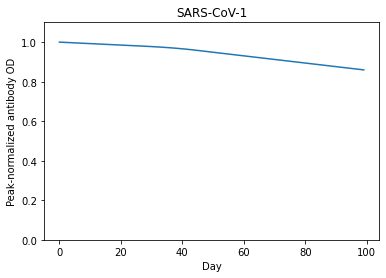

In [94]:
from matplotlib import pyplot as plt8
plt8.plot(sarscov2antibodytimecourse)
plt8.ylim(0,1.1)
plt8.xlabel("Day")
plt8.ylabel("Peak-normalized antibody OD")
plt8.title('SARS-CoV-1')
plt8.show()

In [95]:
df4 = pd.DataFrame(sarscov2antibodytimecourse, columns=["Antibody Time Course"])
df4.to_csv('SARS-CoV-2-Antibody-Time-Course.csv', index=False)

In [96]:
sarscov2baseline = 0.1298892

###This baseline peak-normalized N IgG antibody level for SARS-CoV-2 comes from the ancestral and descendent states analysis that used the baselines for the human "seasonal" coronaviruses to estimate the baselines for the zoonotic coronaviruses.

In [97]:
sarscov2lsfuncwfixedbaseline = 0
currentMinValue = float('inf')
currentMinValue

for index in range(0, (len(sarscov2antibodytimecourse))):
    #print(sarscov2antibodytimecourse[index] )
    ##Need to find the step value and maximum value for this lambdaValue
    lambdaValue = 0.002
    ##Added 11/28
    sarscov2lsfuncwfixedbaseline = (sarscov2antibodytimecourse[index]) - math.pow((calculatelambda(sarscov2baseline, lambdaValue, index)), 2) 
    #print(sarscov2lsfuncwfixedbaseline)
    
    if sarscov2lsfuncwfixedbaseline < currentMinValue:
        currentMinValue = sarscov2lsfuncwfixedbaseline      

In [98]:
print(len(sarscov2antibodytimecourse))

100


In [99]:
print(currentMinValue)

0.0


In [100]:
sarscov2halflife = np.log(2) / 0.004661402990405273 

In [101]:
print(sarscov2halflife)

148.6992611423372


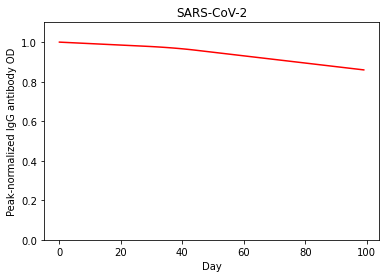

In [102]:
from matplotlib import pyplot as plt9
plt9.plot(sarscov2antibodytimecourse, color='red')
plt9.ylim(0,1.1)
plt9.xlabel("Day")
plt9.ylabel("Peak-normalized IgG antibody OD")
plt9.title('SARS-CoV-2')
plt9.show()

In [103]:
print(len(sarscov2antibodytimecourse))

100


In [104]:
sarscov2antibodytimecourseplusexp = sarscov2antibodytimecourse
day = len(sarscov2antibodytimecourse)

day

100

In [105]:
#while day < 4393:
#Small file 86 records
#while day < 88:
maxDays = 86
while day < maxDays:
    day = day + 1
    print("day")
    print(day)
    exponentValueBaseLine = -0.004661402990405273
    tempValue = sarscov1baseline + (sarscov2antibodytimecourseplusexp[day-1] - sarscov1baseline) * math.exp(exponentValueBaseLine)
    print('tempValue')
    print(tempValue)
    sarscov2antibodytimecourseplusexp.append(tempValue)

In [106]:
print(sarscov2antibodytimecourseplusexp)

[1.0, 0.9992536738518707, 0.9985073477037414, 0.9977610215556121, 0.9970146954074828, 0.9962683692593535, 0.9955220431112242, 0.9947757169630949, 0.9940293908149656, 0.9932830646668362, 0.9925367385187069, 0.9917904123705776, 0.9910440862224483, 0.990297760074319, 0.9895514339261897, 0.9888051077780604, 0.9880587816299311, 0.9873124554818018, 0.9865661293336725, 0.9858198031855432, 0.9850734770374139, 0.9843271508892846, 0.9835808247411553, 0.982834498593026, 0.9820881724448967, 0.9813418462967674, 0.980595520148638, 0.9798491940005087, 0.9790947606570282, 0.9782997696532706, 0.9774620406457751, 0.9765792760777708, 0.9756490548778943, 0.974668825820156, 0.9736359005269438, 0.9725474460958752, 0.9714004773302749, 0.9701918485519704, 0.9689182449739502, 0.9675761736092245, 0.9661619536909543, 0.9646717065775741, 0.9631013451152252, 0.9614465624283209, 0.9597028201075039, 0.9578813118872282, 0.9560598036669526, 0.954238295446677, 0.9524167872264014, 0.9505952790061258, 0.9487737707858502,

In [107]:
print(len(sarscov2antibodytimecourseplusexp))

100


Text(0.5, 1.0, 'SARS-CoV-2')

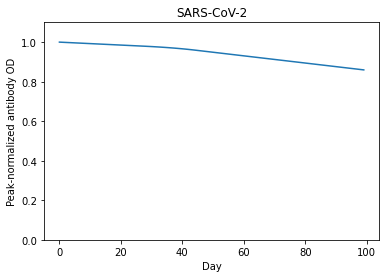

In [108]:
import matplotlib.pyplot as plt2
plt2.plot(sarscov2antibodytimecourseplusexp)
#f = plt2.figure()
plt2.ylim(0,1.1)
plt2.xlabel("Day")
plt2.ylabel("Peak-normalized antibody OD")
plt2.title('SARS-CoV-2')

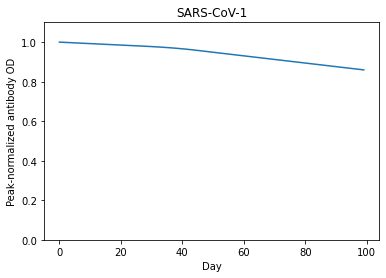

In [109]:
import matplotlib.pyplot as plt10

f = plt10.figure()
plt10.plot(sarscov2antibodytimecourseplusexp)

plt10.ylim(0,1.1)
plt10.xlabel("Day")
plt10.ylabel("Peak-normalized antibody OD")
plt10.title('SARS-CoV-1')
plt10.show()

f.savefig("SARS-CoV-2_nOD-by-Day.pdf", bbox_inches='tight')

##### SARS-CoV-2 Probability of Infection | Antibody OD

In [110]:
import math

def sarscov2probinfgivenaod(aod):
    exponentValue = 4.997881 + (11.099285 * aod)
    result = 1 / (1 + math.exp(exponentValue))
    return result

In [111]:
sarscov2probinfgivenaodList = list()

currentValue = 0;

while( currentValue <= 1):
    currentValue = currentValue + 0.00625
    sarscov2probinfgivenaodList.append(sarscov2probinfgivenaod(currentValue))

In [112]:
print(sarscov2probinfgivenaodList)

[0.006260273016612123, 0.005843166808398569, 0.005453698818166833, 0.005090057352396867, 0.0047505469371580625, 0.004433581191362633, 0.004137676093955315, 0.003861443629092698, 0.0036035857931512425, 0.0033628889473563293, 0.0031382184999168964, 0.0029285139017559774, 0.002732783940225708, 0.002550102315567287, 0.0023796034853058264, 0.0022204787622435414, 0.0020719726522206478, 0.0019333794183414856, 0.0018040398589059226, 0.0016833382868355494, 0.0015706996989351114, 0.0014655871238771479, 0.0013674991383379005, 0.0012759675412423227, 0.0011905551765927344, 0.001110853895857513, 0.0010364826513817643, 0.0009670857127499214, 0.0009023309984802114, 0.0008419085158622217, 0.000785528902161321, 0.0007329220608074254, 0.0006838358865605804, 0.0006380350740024998, 0.0005953000040417818, 0.000555425703441567, 0.000518220872682436, 0.0004835069777608483, 0.0004511174017951428, 0.0004208966525675465, 0.0003926996223724976, 0.0003663908967695135, 0.0003418441090534263, 0.000318941337456767, 0

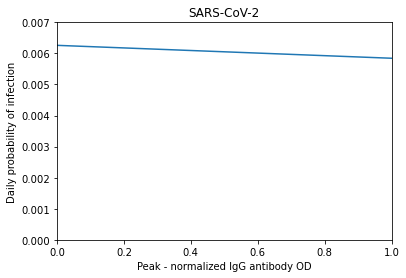

In [113]:
import matplotlib.pyplot as plt11

plt11.plot(sarscov2probinfgivenaodList)
plt11.ylim(0,0.007)
plt11.xlim(0.0, 1.0)
plt11.xlabel("Peak - normalized IgG antibody OD")
plt11.ylabel("Daily probability of infection")
plt11.title('SARS-CoV-2')
plt11.show()

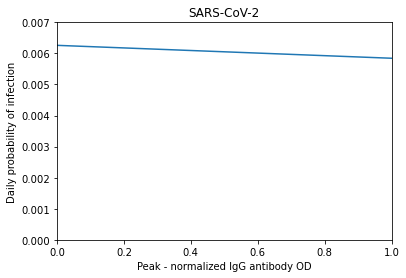

In [114]:
import matplotlib.pyplot as plt12

f12 = plt12.figure()
plt12.plot(sarscov2probinfgivenaodList)

plt12.ylim(0,0.007)
plt12.xlim(0.0, 1.0)
plt12.xlabel("Peak - normalized IgG antibody OD")
plt12.ylabel("Daily probability of infection")
plt12.title('SARS-CoV-2')
plt12.show()

f12.savefig("SARS-CoV-2_PrInf-by-Day.pdf", bbox_inches='tight')

Text(0.5, 1.0, 'SARS-CoV-2')

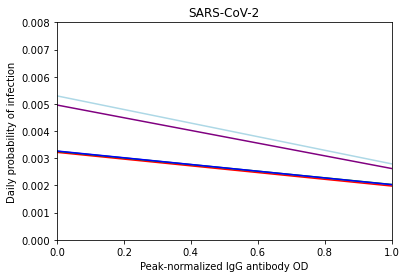

In [115]:
from matplotlib import pyplot as plt13

sarscov2probinfList1 = populatesarscov1probinfList(-4.997881, -11.099285)

plt13.plot(sarscov1probinfList1, color='red')
plt13.ylim(0,0.008)
plt13.xlim(0.0, 1.0)
plt13.xlabel("Peak-normalized IgG antibody OD")

sarscov2probinfList2 = populatesarscov1probinfList(-5.1806, -9.802874)
sarscov2probinfList3 = populatesarscov1probinfList(-4.76283, -12.00514)
sarscov2probinfList4 = populatesarscov1probinfList(-4.5831338, -13.20581)
sarscov2probinfList5 = populatesarscov1probinfList(-5.12873, -10.142186)

plt13.plot(sarscov1probinfList2, color = 'green')
plt13.plot(sarscov1probinfList3, color = 'lightblue')
plt13.plot(sarscov1probinfList4, color = 'purple')
plt13.plot(sarscov1probinfList5, color = 'blue')

plt13.ylabel("Daily probability of infection")
plt13.title('SARS-CoV-2')
#plt.show()

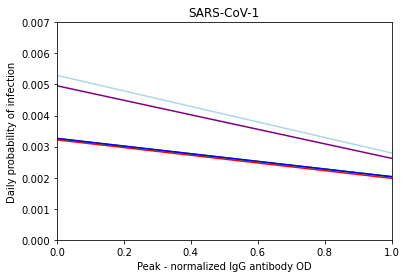

In [116]:
import matplotlib.pyplot as plt14

f14 = plt14.figure()
plt14.plot(sarscov1probinfList1, color='red')
plt14.plot(sarscov1probinfList2, color = 'green')
plt14.plot(sarscov1probinfList3, color = 'lightblue')
plt14.plot(sarscov1probinfList4, color = 'purple')
plt14.plot(sarscov1probinfList5, color = 'blue')

plt14.ylim(0,0.007)
plt14.xlim(0.0, 1.0)

plt14.xlabel("Peak - normalized IgG antibody OD")
plt14.ylabel("Daily probability of infection")
plt14.title('SARS-CoV-1')
plt14.show()

f14.savefig("SARS-CoV-2_PrInfs-by-nOD.pdf", bbox_inches='tight')

##### SARS-CoV-2 Probability of No Reinfection Time Course

In [117]:
sarscov2probnoreinfectiontimecourse = list()

day = 0
sarscov2probnoreinfectiontimecourse.append(1.0)

sarscov2probnoreinfectiontimecourse.append(sarscov2probnoreinfectiontimecourse[day] * (1-sarscov2probinfgivenaod(sarscov2antibodytimecourseplusexp[day+1])))

In [118]:
print(sarscov2probnoreinfectiontimecourse)

[1.0, 0.9999998970355873]


In [119]:
print(len(sarscov2antibodytimecourse))

100


In [120]:
#### Need to change days to 4393
while day < 85:
    
    if(day < len(sarscov2antibodytimecourse)):
        sarscov2probnoreinfectiontimecourse.append(sarscov2probnoreinfectiontimecourse[day] * (1 - sarscov2probinfgivenaod(sarscov2antibodytimecourseplusexp[day + 1])))
    else:
        #sarscov2probnoreinfectiontimecourse.append(sarscov2probnoreinfectiontimecourse[day] * (1 - sarscov2probinfgivenaod(sarscov2antibodytimecourseplusexp[1392])))
        sarscov2probnoreinfectiontimecourse.append(sarscov2probnoreinfectiontimecourse[day] * (1 - sarscov2probinfgivenaod(sarscov2antibodytimecourseplusexp[42])))
            
    day = day + 1   

In [121]:
print(sarscov2probnoreinfectiontimecourse)

[1.0, 0.9999998970355873, 0.9999998970355873, 0.999999793214718, 0.9999997923511267, 0.9999996876594935, 0.9999996859178844, 0.9999995803409412, 0.9999995777066467, 0.9999994712296041, 0.999999467687712, 0.9999993602955337, 0.9999993558308824, 0.9999992475082811, 0.9999992421054558, 0.9999991328368885, 0.9999991264802167, 0.9999990162498811, 0.9999990089234287, 0.9999988977152582, 0.9999988894028251, 0.9999987772004848, 0.9999987678855999, 0.9999986546724822, 0.9999986443383994, 0.9999985300976191, 0.9999985187273125, 0.9999984034417023, 0.9999983910178619, 0.9999982746583799, 0.9999982610931506, 0.9999981435199851, 0.9999981286635411, 0.9999980097160005, 0.9999979933958446, 0.9999978728885888, 0.9999978549053888, 0.9999977326238227, 0.9999977127463081, 0.9999975884409156, 0.9999975663995746, 0.9999974397788971, 0.9999974152581403, 0.9999972859800118, 0.9999972586083488, 0.9999971262688656, 0.9999970956353955, 0.9999969599675065, 0.9999969259376369, 0.9999967868040016, 0.99999674923758

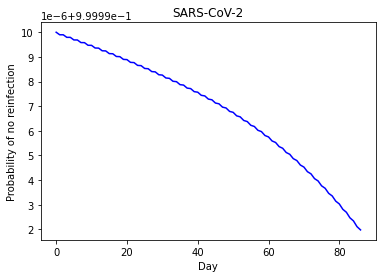

In [122]:
plt.plot(sarscov2probnoreinfectiontimecourse, color='blue')
#Limit not working
#plt.ylim(0,1.1)
plt.xlabel("Day")
plt.ylabel("Probability of no reinfection")
plt.title('SARS-CoV-2')
plt.show()

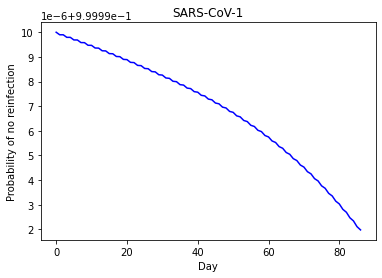

In [123]:
import matplotlib.pyplot as plt15

f15 = plt15.figure()
plt15.plot(sarscov2probnoreinfectiontimecourse, color = 'blue')

#plt6.ylim(0,0.007)
#plt6.xlim(0.0, 1.0)

plt15.xlabel("Day")
plt15.ylabel("Probability of no reinfection")
plt15.title('SARS-CoV-1')
plt15.show()

f15.savefig("SARS-CoV-2_PnorInfTimecourse-by-" + str(datetime.now().strftime('%Y_%m_%d_%H_%M_%S')) + ".pdf", bbox_inches='tight')

In [124]:
sarscov2probreinfection = list()
day = 0;

In [125]:
#while day < 4393:
while day < 85:
    day = day + 1  
        
    #if day < 1392:
    if day < 42:
        tempValue = sarscov2probinfgivenaod(sarscov2antibodytimecourseplusexp[day]) * sarscov2probnoreinfectiontimecourse[day]
    else:       
        #empValue = sarscov2probinfgivenaod(sarscov2antibodytimecourseplusexp[1392])  * sarscov2probnoreinfectiontimecourse[day]
        tempValue = sarscov2probinfgivenaod(sarscov2antibodytimecourseplusexp[43])  * sarscov2probnoreinfectiontimecourse[day]
    
    sarscov2probreinfection.append(tempValue)      

Text(0.5, 1.0, 'SARS-CoV-2')

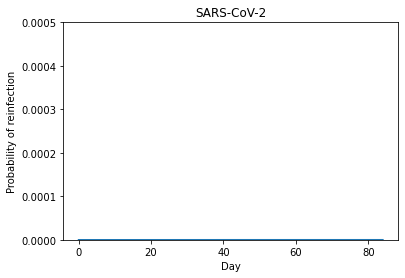

In [126]:
import matplotlib.pyplot as plt17
plt17.plot(sarscov2probreinfection)
plt17.ylim(0, 0.0005)
plt17.xlabel("Day")
plt17.ylabel("Probability of reinfection")
plt17.title('SARS-CoV-2') 

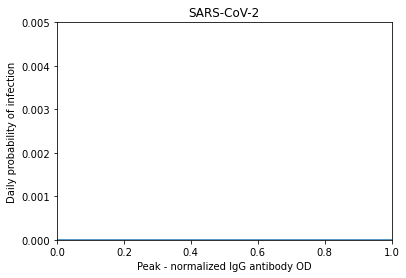

In [127]:
import matplotlib.pyplot as plt17

f17 = plt17.figure()
plt17.plot(sarscov2probreinfection)

plt17.ylim(0,0.005)
plt17.xlim(0.0, 1.0)
plt17.xlabel("Peak - normalized IgG antibody OD")
plt17.ylabel("Daily probability of infection")
plt17.title('SARS-CoV-2')
plt17.show()

f17.savefig("SARS-CoV-2_PrInf-by-nOD" + str(datetime.now().strftime('%Y_%m_%d_%H_%M_%S')) + ".pdf", bbox_inches='tight')